# Desafío - Mecanismos de Votación
## Daniela Hurtado


__Descripción__

Para esta actividad desarrollaremos un ensamble heterogéneo que prediga la popularidad o inpopularidad de contenido en línea de un sitio web. El archivo csv tiene un total de 39797 registros, donde cada uno representa características del artículo publicado en el sitio web. Cada registro tiene
un total de 61 atributos que miden características del texto, cantidad de imágenes, keywords, etc. Los artículos provienen de la publicación K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent
Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal.. Los artículos registrados son de la página web www.mashable.com.

Más información sobre los atributos se puede encontrar en el archivo
OnlineNewsPopularity.names .




# Ejercicio 1 - Preparación del Ambiente de Trabajo
A continuación se le presenta un código que agrupa las variables por grupos. Cada uno de éstos
hace referencia a alguna característica de los registros en la base de datos. Genere una análisis
descriptivo de cada uno de los atributos. Puede utilizar la función grid_plot_batch que se
encuentra en el archivo helpers.py .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

import re


In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [3]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [5]:
df.shape

(39644, 61)

In [6]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [7]:
# las etiquetas de las columnas presentan un espacio extra, con ésto lo podemos eliminar
df.columns = [i.replace(' ', '') for i in df.columns]
# eliminamos el string de url que no sirve para el análisis
df = df.loc[:, 'n_tokens_title':'shares']

# generamos el conjunto de variables
qnty = df.filter(regex='^n_', axis=1)
channel = df.filter(regex='^data_', axis=1)
days = df.filter(regex=re.compile("weekday|weekend"), axis=1)
sentiments = df.filter(regex=re.compile("negative|positive|subjectivity"),axis=1)
lda = df.filter(regex='^LDA_\d', axis=1)
keywords = df.filter(regex='^kw_', axis=1)

In [8]:
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [9]:
qnty.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens'],
      dtype='object')

In [10]:
def grid_plot_batch(df, cols, plot_type):

    """
    grid_plot_batch: Genera una grilla matplotlib para cada conjunto de variables.

    Parámetros de ingreso:
        - df: un objeto pd.DataFrame
        - cols: cantidad de columnas en la grilla.
        - plot_type: tipo de gráfico a generar. Puede ser una instrucción genérica de matplotlib o seaborn.

    Retorno:
        - Una grilla generada con plt.subplots y las instrucciones dentro de cada celda.

    """
    # calcular un aproximado a la cantidad de filas
    rows = np.ceil(df.shape[1] / cols)

    # para cada columna
    for index, (colname, serie) in enumerate(df.iteritems()):
        plt.subplot(rows, cols, index + 1)
        plot_type(serie)
        plt.tight_layout()

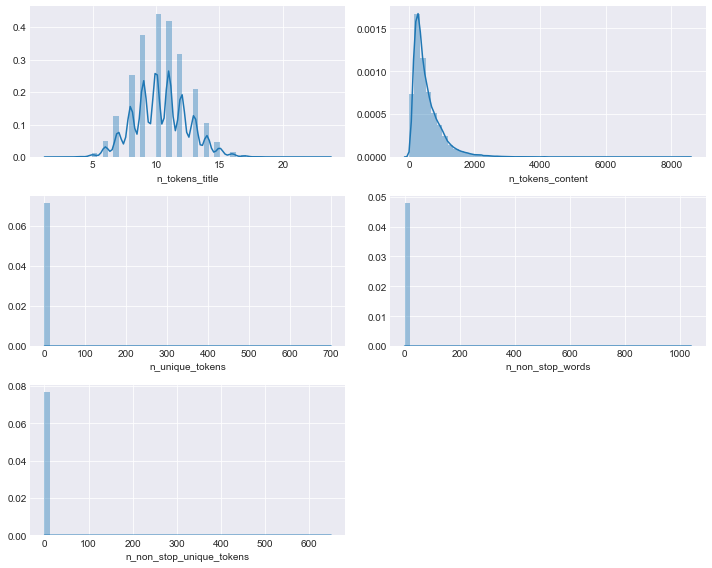

In [11]:
plt.figure(figsize=(10, 8))
grid_plot_batch(qnty, 2, sns.distplot)

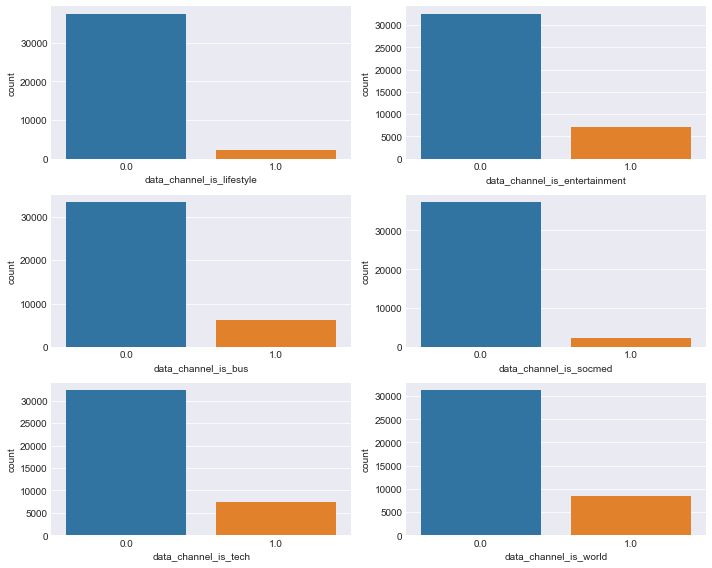

In [25]:
plt.figure(figsize=(10, 8))
grid_plot_batch(channel, 2, sns.countplot)

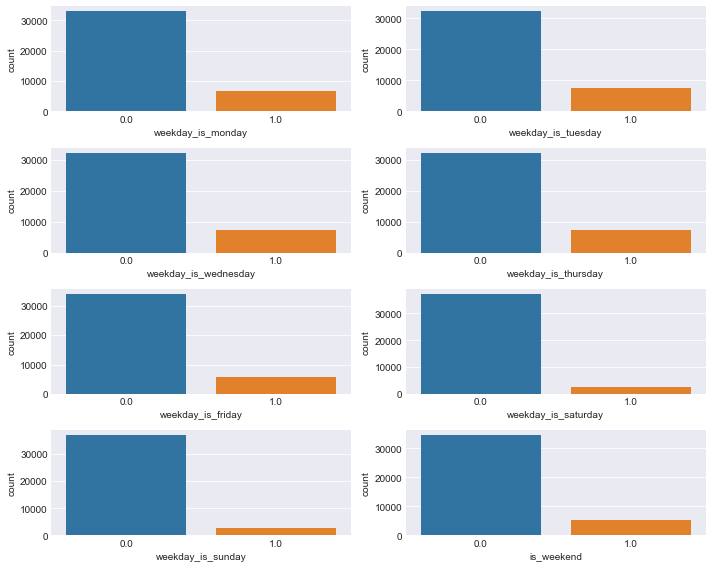

In [13]:
plt.figure(figsize=(10, 8))
grid_plot_batch(days, 2, sns.countplot)

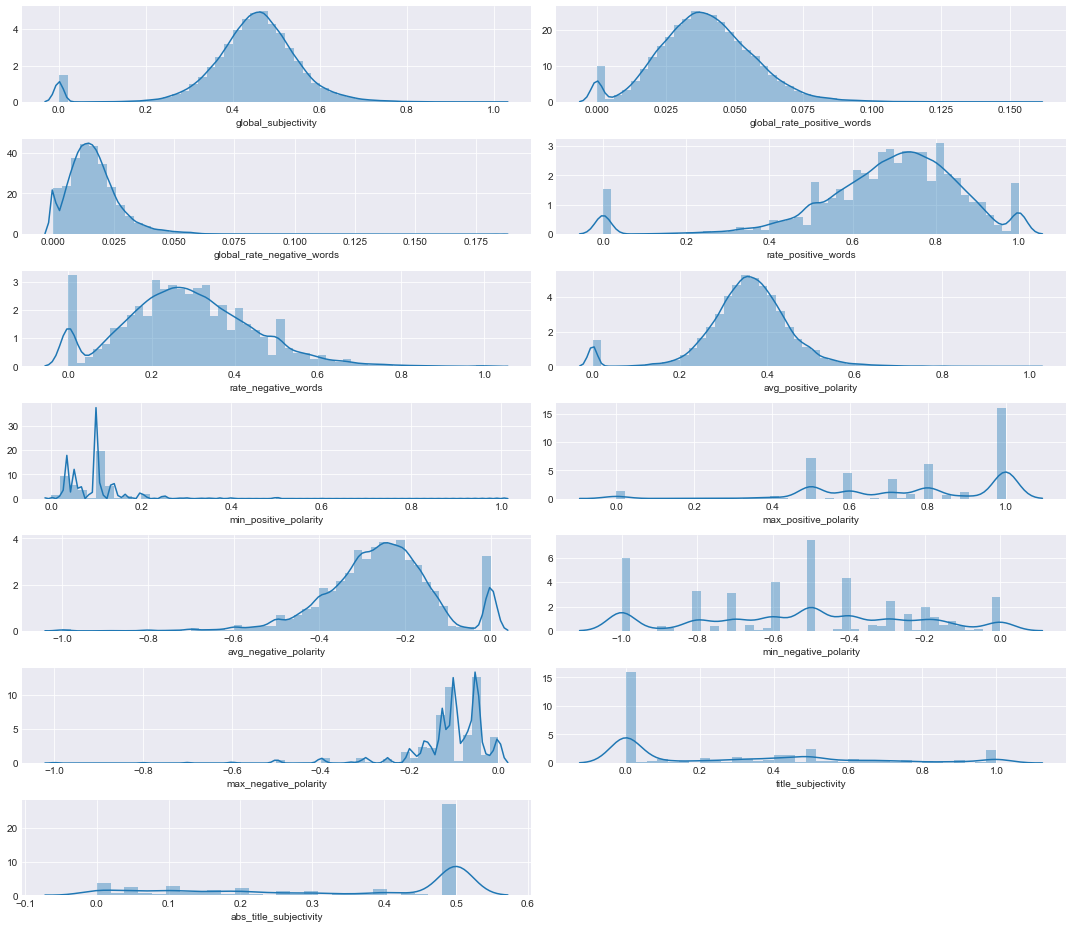

In [14]:
plt.figure(figsize=(15, 13))
grid_plot_batch(sentiments, 2, sns.distplot)

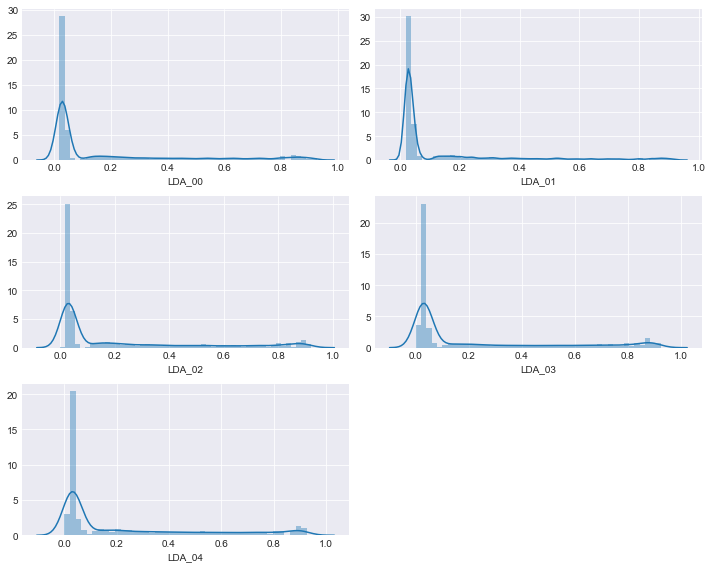

In [15]:
plt.figure(figsize=(10, 8))
grid_plot_batch(lda, 2, sns.distplot)

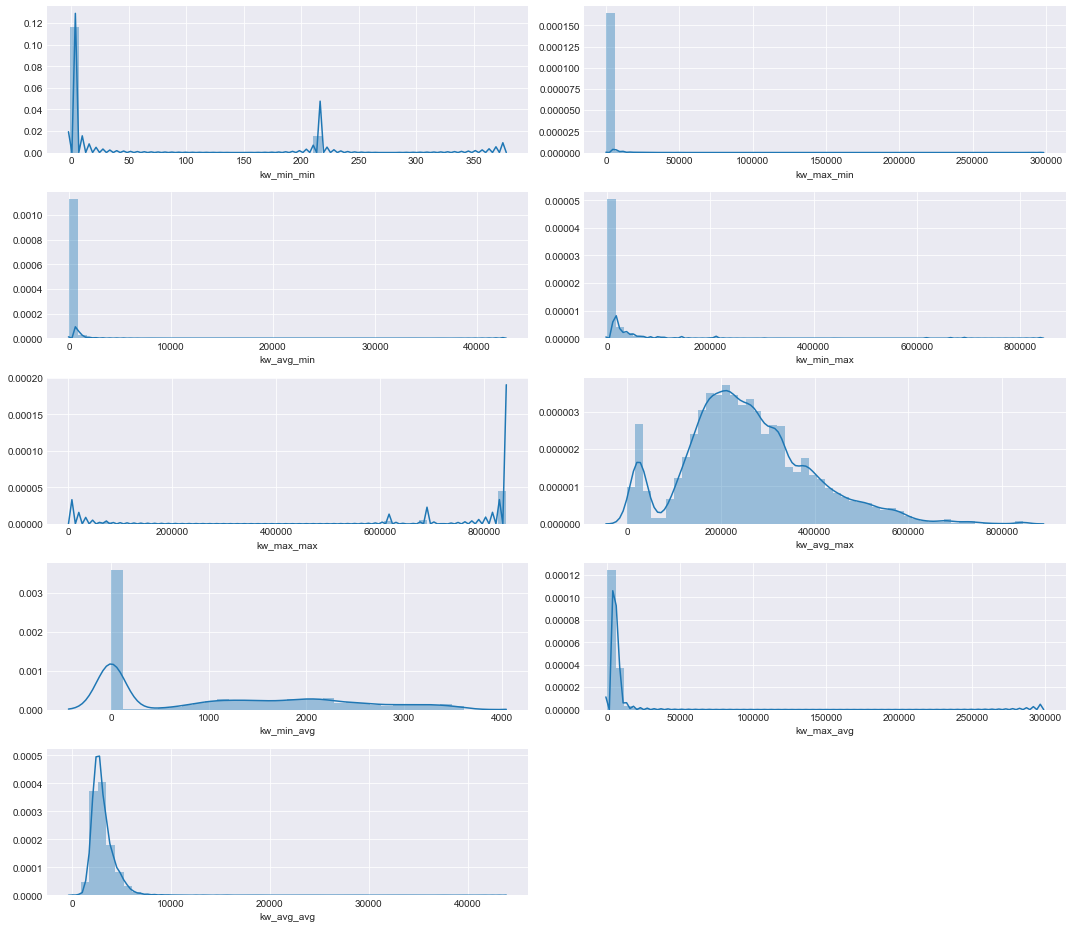

In [16]:
plt.figure(figsize=(15, 13))
grid_plot_batch(keywords, 2, sns.distplot)

* Describa el comportamiento de las variables.


* Dada la naturaleza de los atributos, es probable que algunas mediciones estén correlacionadas entre sí. Para ello, genere un diagnóstico previo de multicolinealidad utilizando la función identify_high_correlations que se encuentra en el archivo helpers.py . Para todos aquellos atributos que tengan una correlación de .8, reporte sus nombres.


* Antes de generar los conjuntos de entrenamiento y validación, preprocese los datos con los siguientes pasos:

    * Recodifique la variable shares en una variable binaria que identifique como 1 todos los registros con más de 1400 "compartir" y 0 de lo contrario. Para evitar multicolinealidad, elimine la variable shares posteriormente.
    * Elimine todas las variables que presentaban una correlación mayor a .8. Este paso es para evitar la multicolinealidad de los atributos.
    * Genere un análisis de Componentes Principales para extraer las principales 30 dimensiones. Guarde estas dimensiones en un nuevo objeto.

In [17]:
def identify_high_correlations(df, threshold=.8):
    """
    identify_high_correlations: Genera un reporte sobre las correlaciones existentes entre variables, condicional a un nivel arbitrario.

    Parámetros de ingreso:
        - df: un objeto pd.DataFrame, por lo general es la base de datos a trabajar.
        - threshold: Nivel de correlaciones a considerar como altas. Por defecto es .7.

    Retorno:
        - Un pd.DataFrame con los nombres de las variables y sus correlaciones
    """

    # extraemos la matriz de correlación con una máscara booleana
    tmp = df.corr().mask(abs(df.corr()) < .8, df)
    # convertimos a long format
    tmp = pd.melt(tmp)
    # agregamos una columna extra que nos facilitará los cruces entre variables
    tmp['var2'] = list(df.columns) * len(df.columns)
    # reordenamos
    tmp = tmp[['variable', 'var2', 'value']].dropna()
    # eliminamos valores duplicados
    tmp = tmp[tmp['value'].duplicated()]
    # eliminamos variables con valores de 1 
    return tmp[tmp['value'] < 1.00]

In [18]:
identify_high_correlations(df)

,variable,var2,value
179,n_non_stop_words,n_unique_tokens,0.999572
238,n_non_stop_unique_tokens,n_unique_tokens,0.999852
239,n_non_stop_unique_tokens,n_non_stop_words,0.999532
1139,kw_avg_min,kw_max_min,0.940529
1256,kw_max_max,kw_min_min,-0.857226
1499,kw_avg_avg,kw_max_avg,0.811864
1678,self_reference_avg_sharess,self_reference_min_shares,0.818907
1679,self_reference_avg_sharess,self_reference_max_shares,0.853480
2317,LDA_02,data_channel_is_world,0.836618


In [19]:
df['shares'] = np.where(df['shares']> 1400, 1, 0)

In [20]:
df2 = df.drop(['n_non_stop_words', 'n_non_stop_unique_tokens', 'n_non_stop_unique_tokens',
            'kw_avg_min', 'kw_max_max', 'kw_avg_avg', 'self_reference_avg_sharess', 
              'self_reference_avg_sharess', 'LDA_02'], axis=1)

In [21]:
df2['shares'].value_counts()

0    20082
1    19562
Name: shares, dtype: int64

In [22]:
df2.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity

In [27]:
# separamos la data en vector objetivo y matriz de atributos
y = df2['shares']
X = df2.drop(['shares'], axis=1)

In [30]:
#escalamos la matriz de atributos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [32]:
# comprobamos
df_scaled.head(2)

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.757447,-0.695210,0.032772,-0.607463,-0.335566,-0.426526,-0.304268,0.156474,-1.164821,-0.236445,...,0.237337,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920
1,-0.661657,-0.618794,0.016056,-0.695709,-0.594963,-0.426526,-0.304268,0.432838,-1.688626,-0.236445,...,-0.640040,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658


In [34]:
from sklearn.model_selection import train_test_split
#Separamos los subsets de test y train
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = .33, random_state = 23748)

In [35]:
#creamos el pca y guardamos el nuevo dataframe obtenido en df_pca
from sklearn.decomposition import PCA
pca = PCA(n_components=30).fit(X_train)
df_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [36]:
# comprobamos dimensiones
df_pca.shape

(26561, 30)

# Ejercicio 2 - Evaluación de modelos individuales

* A continuación generará una serie de modelos que se incorporarán posteriormente al comité de votación. Para ello, se solicita que:
    * Importe los módulos correctamente.
    * Para cada uno de ellos, genere un reporte en las métricas de desempeño respecto a Precision , Recall , F1 . Puede hacer uso de la función
plot_classification_report disponible en el archivo helpers.py .

    * Comente el desempeño general de cada uno
    
* La lista de modelos es la siguiente. Cabe destacar que la mayoría de éstos corresponden a implementaciones vanilla, salvo que se indique lo contrario:
    * Regresión Logística.
    * Algoritmo de KMedias.
    * Árbol de Clasificación con un max_depth=1 .
    * Árbol de Clasificación con un max_depth=4 .

In [38]:
# Importamos las metricas de desempeño
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report
from helpers import plot_classification_report
#Importamos los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

In [40]:
# Modelos

model_logit = LogisticRegression().fit(df_pca, y_train)
model_kmeans = KMeans(n_clusters=2).fit(df_pca)
model_tree1 = DecisionTreeClassifier(max_depth=1).fit(df_pca,y_train)
model_tree4 = DecisionTreeClassifier(max_depth=4).fit(df_pca,y_train)

C:\Users\Sebastian Hurtado\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
# Generamos las predicciones para cada modelo

y_predict_logit = model_logit.predict(X_test_pca)
y_predict_kmeans = model_kmeans.predict(X_test_pca)
y_predict_tree1 = model_tree1.predict(X_test_pca)
y_predict_tree4 = model_tree4.predict(X_test_pca)

#### Generamos las metricas de clasificación para cada modelo
#### Logit

In [44]:
print(classification_report(y_test, y_predict_logit))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64      6652
           1       0.63      0.62      0.63      6431

    accuracy                           0.64     13083
   macro avg       0.64      0.64      0.64     13083
weighted avg       0.64      0.64      0.64     13083



#### Kmeans

In [46]:
print(classification_report(y_test, y_predict_kmeans))

              precision    recall  f1-score   support

           0       0.53      0.68      0.59      6652
           1       0.52      0.37      0.43      6431

    accuracy                           0.53     13083
   macro avg       0.52      0.52      0.51     13083
weighted avg       0.52      0.53      0.51     13083



#### Arboles de clasificacion con depth=1

In [48]:
print(classification_report(y_test, y_predict_tree1))

              precision    recall  f1-score   support

           0       0.59      0.56      0.58      6652
           1       0.57      0.59      0.58      6431

    accuracy                           0.58     13083
   macro avg       0.58      0.58      0.58     13083
weighted avg       0.58      0.58      0.58     13083



#### Arboles de clasificacion con depth=4

In [49]:
print(classification_report(y_test, y_predict_tree4))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      6652
           1       0.62      0.61      0.61      6431

    accuracy                           0.62     13083
   macro avg       0.62      0.62      0.62     13083
weighted avg       0.62      0.62      0.62     13083



# Ejercicio 3 - Entrenamiento de Comité

* Entrene el comité de clasificadores sin modificar el esquema de votación.
* Reporte el desempeño a nivel de cada clase para cada métrica.

In [51]:
# lista de tuplas con los estimadores.
estimadores =[('Regresion logistica',LogisticRegression()),
             ('KMeans',KMeans(n_clusters=2)),
             ('Decision tree classifier 1',DecisionTreeClassifier(max_depth=1)),
             ('Decision tree classifier 4',DecisionTreeClassifier(max_depth=4))]

In [52]:
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimadores).fit(df_pca,y_train)

C:\Users\Sebastian Hurtado\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
# definimos nuestro y predict
y_predict_voting = voting_classifier.predict(X_test_pca)
#generamos el reporte de clasificación
print(classification_report(y_test, y_predict_voting))

              precision    recall  f1-score   support

           0       0.60      0.75      0.66      6652
           1       0.65      0.48      0.55      6431

    accuracy                           0.61     13083
   macro avg       0.62      0.61      0.61     13083
weighted avg       0.62      0.61      0.61     13083



# Ejercicio 4 - Calibración de Comité con Ponderadores

* El base al comportamiento de los clasificadores individuales del ensamble, proponga dos
esquemas de ponderación para mejorar el desempeño del modelo.
* Reporte el desempeño del mejor ensamble heterogéneo.

In [67]:
# Definimos un diccionario con los parametros 
ponderaciones = {'Aumento_kmeans':[.5, .5, .0, .5], 'Aumento_arbol1':[.35, .15, .15, .35]}

In [68]:
from lec10_graphs import weighting_schedule

C:\Users\Sebastian Hurtado\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sebastian Hurtado\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


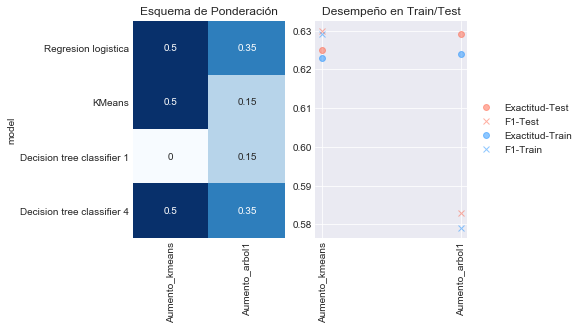

In [69]:
weighting_schedule(voting_classifier, df_pca, X_test_pca, y_train, y_test, ponderaciones)